In [36]:
source("~/BrusselSprouts/scripts/functions.R")

In [37]:
trd_file="/home/jnrunge/data/trd/genotypes/YJNRC2.mpileup-readable.txt.gz"
mpileup_file="/home/jnrunge/data/trd/genotypes/YJNRC2.mpileup.txt.gz"
OHLoci_GT_file="~/data/TRD/Oppo-Homo-Pos/YJNRC2.ohloci.GT.gz"

In [38]:
trd=fread(trd_file)
mpileup=fread(mpileup_file)
OHLoci_GT=fread(OHLoci_GT_file)

In [39]:
SameAllele=function(x){
    # bcftools does not let me compare GTs between samples, so here I am finding the few instances where my loci filter does not work (when both are 2/2 I think)
    a1=substr(OHLoci_GT$V6[x],1,1)
    a2=substr(OHLoci_GT$V7[x],1,1)
    
    return(a1==a2)
}

In [40]:
OHLoci_GT=OHLoci_GT[!unlist(lapply(1:nrow(OHLoci_GT), SameAllele)),]
nrow(OHLoci_GT)

[1] 55954

In [41]:
summary(trd$countID1-trd$countID2)
trd=subset(trd, paste(chr,pos) %in% paste(OHLoci_GT$V1,OHLoci_GT$V2)) # to implement the fix above but also in case OHLoci_GT has been made stricter since last mpilup
chrs=summarise(group_by(trd, chr),maxPos=max(pos))

trd$global_pos=trd$pos
for(c in 2:length(unique(trd$chr))){
    chr=unique(trd$chr)[c]
    trd$global_pos[trd$chr==chr]=trd$pos[trd$chr==chr]+sum(chrs$maxPos[chrs$chr%in%unique(trd$chr)[1:(c-1)]])
}
head(trd)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-182.000    0.000    3.000    3.732    8.000  825.000 

,chr,pos,countID1,countID2,global_pos
,<chr>,<int>,<int>,<int>,<int>
2,chromosome1,986,2,1,986
3,chromosome1,990,1,1,990
13,chromosome1,12361,1,1,12361
14,chromosome1,12363,1,1,12363
17,chromosome1,13419,0,0,13419
19,chromosome1,13459,0,0,13459


In [42]:
trd_AF1=subset(trd, (countID1==0 | countID2==0) & (countID1+countID2)>15)
head(trd_AF1)
nrow(trd_AF1)

,chr,pos,countID1,countID2,global_pos
,<chr>,<int>,<int>,<int>,<int>
298,chromosome1,28844,16,0,28844
371,chromosome1,37913,16,0,37913
413,chromosome1,43137,19,0,43137
443,chromosome1,49458,17,0,49458
495,chromosome1,59145,16,0,59145
502,chromosome1,61100,18,0,61100


[1] 1087

In [43]:
summarise(group_by(OHLoci_GT, paste(V1,V2)%in%paste(trd_AF1$chr,trd_AF1$pos), substr(V6,1,1), substr(V7,1,1)), n=n())

`summarise()` has grouped output by 'paste(V1, V2) %in% paste(trd_AF1$chr, trd_AF1$pos)', 'substr(V6, 1, 1)'. You can override using the
`.groups` argument.


"paste(V1, V2) %in% paste(trd_AF1$chr, trd_AF1$pos)","substr(V6, 1, 1)","substr(V7, 1, 1)",n
<lgl>,<chr>,<chr>,<int>
FALSE,0,1,19684
FALSE,0,2,224
FALSE,0,3,2
FALSE,1,0,33931
FALSE,1,2,57
FALSE,2,0,847
FALSE,2,1,99
FALSE,3,0,20
FALSE,3,1,3


In [33]:
ascii_score_to_numeric = function(ascii)
    {
    return(mean(utf8ToInt(ascii)-33))
}
mpileup$meanBQ=unlist(lapply(mpileup$V6,ascii_score_to_numeric))
head(mpileup)

,V1,V2,V3,V4,V5,V6,meanBQ
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
1,chromosome1,915,G,2,..,ee,68.00000
2,chromosome1,986,A,3,gG.,CeC,45.33333
3,chromosome1,990,G,2,C.,eC,51.00000
4,chromosome1,6721,T,1,.,O,46.00000
5,chromosome1,6722,A,1,.,O,46.00000
6,chromosome1,7403,A,4,....,CCCC,34.00000


In [34]:
OHLoci_GT_AF1=subset(OHLoci_GT, paste(V1,V2) %in% paste(trd_AF1$chr, trd_AF1$pos))
mpileup_AF1=subset(mpileup, paste(V1,V2) %in% paste(trd_AF1$chr, trd_AF1$pos))

In [35]:
head(OHLoci_GT_AF1)
head(mpileup_AF1)

,V1,V2,V3,V4,V5,V6,V7
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
3058,chromosome1,28844,C,T,GT:AD:DP:GQ:PGT:PID:PL:PS,"1/1:2,208:210:99:.:.:7610,573,0:.","0/0:283,0:283:99:.:.:0,120,1800:."
5480,chromosome1,37913,G,A,GT:AD:DP:GQ:PGT:PID:PL:PS,"0/0:251,0:251:99:.:.:0,120,1800:.","1|1:2,383:385:99:1|1:37913_G_A:16856,1069,0:37913"
6914,chromosome1,43137,C,T,GT:AD:DP:GQ:PGT:PID:PL:PS,"0/0:215,0:215:99:.:.:0,120,1800:.","1/1:1,375:376:99:.:.:15033,1087,0:."
8248,chromosome1,49458,C,T,GT:AD:DP:GQ:PGT:PID:PL:PS,"0/0:216,0:216:99:.:.:0,120,1800:.","1/1:7,438:445:99:.:.:17570,1073,0:."
10313,chromosome1,59145,T,C,GT:AD:DP:GQ:PL,"0/0:182,0:182:99:0,120,1800","1/1:3,268:271:99:10300,700,0"
10709,chromosome1,61100,T,G,GT:AD:DP:GQ:PL,"0/0:206,0:206:99:0,120,1800","1/1:4,366:370:99:14841,977,0"


,V1,V2,V3,V4,V5,V6,meanBQ
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
298,chromosome1,28844,C,16,TttttTTTTTTttTtT,eCCCCCOeOCeCCCCe,44.00000
371,chromosome1,37913,G,16,".,.,,.,,,.,.,,..",]CeCCeCCCCCeCCCC,42.00000
413,chromosome1,43137,C,19,",..,..$...,.,,,.,,,.",CeeCCeeeCCCCCCeCCC],46.10526
443,chromosome1,49458,C,17,".,,,,..,,...,,...",eCCCCCCCCCCeCCCCC,38.00000
495,chromosome1,59145,T,16,"..,,,,.....,...,",]CCCCCeCCCCCCCCC,37.75000
502,chromosome1,61100,T,18,".,,.,...,,.....,,.",eCCeCeeeCCeCeCCCCC,47.22222


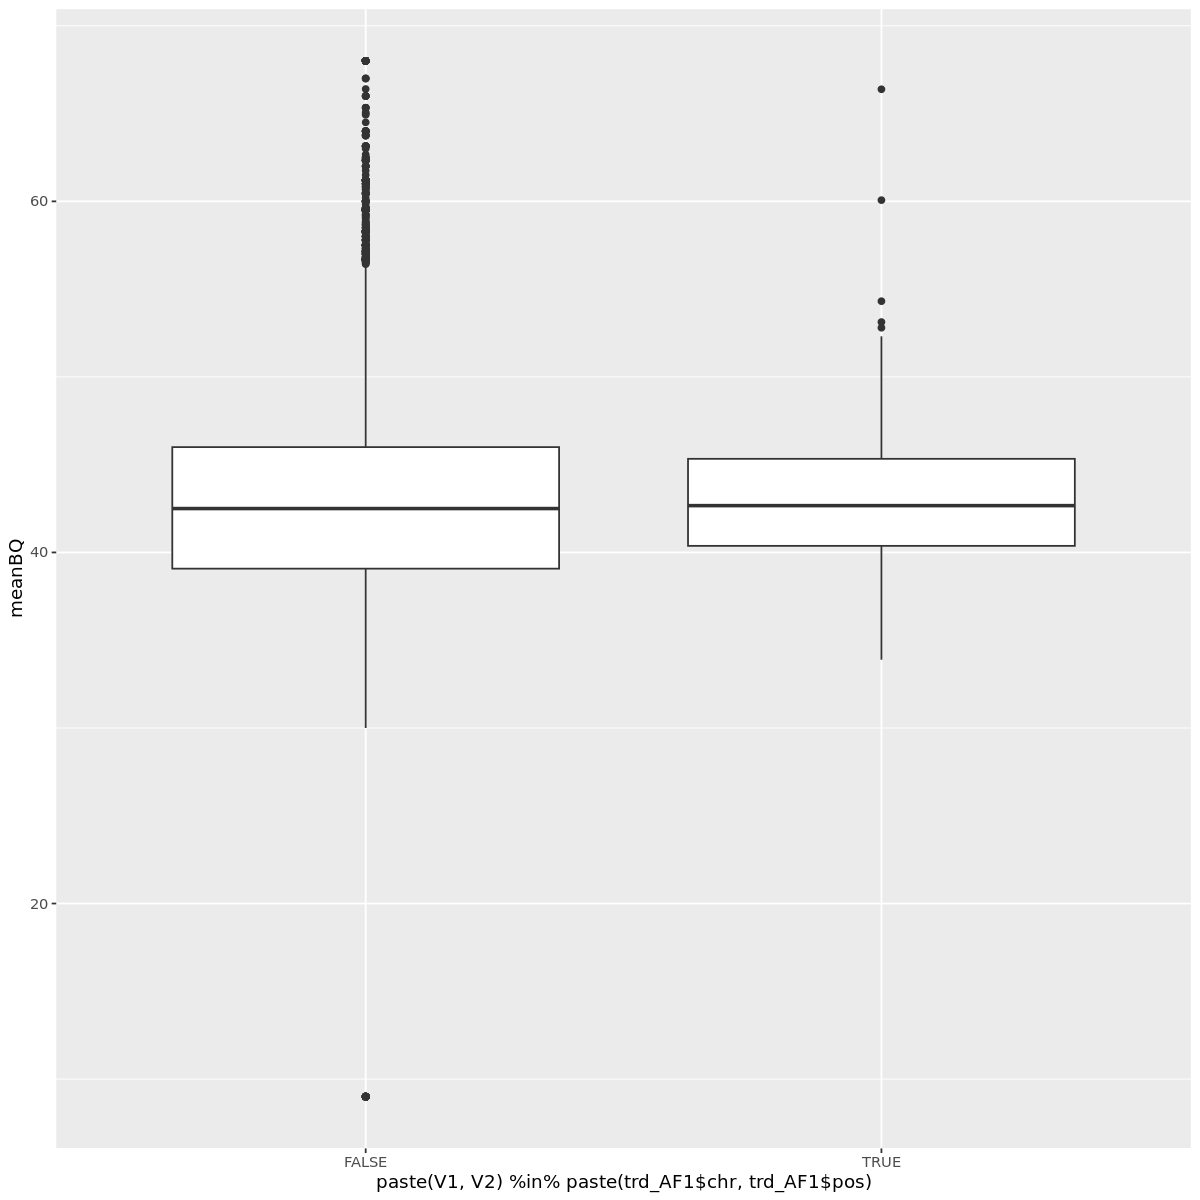

In [23]:
ggplot(mpileup, aes(paste(V1,V2) %in% paste(trd_AF1$chr, trd_AF1$pos),
                   meanBQ))+
geom_boxplot()